In [80]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
from pandas.plotting import scatter_matrix

# Part 1: Load & Clean the Data

In [81]:
ibm_data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
stack_overflow_data = pd.read_csv('data/stack-overflow-developer-survey-2017/survey_results_public.csv')

## We will take the following columns to analyze in stack_overflow
- FormalEducation
- MajorUndergrad
- Gender
- JobSatisfaction
- Salary
- ExpectedSalary
- YearsProgram
- DeveloperType
- NonDeveloperType

In [82]:
stack_overflow_columns = ['FormalEducation', 'MajorUndergrad','Gender', 'JobSatisfaction','Salary','YearsProgram','DeveloperType']

## We will take the following columns to analyze in IBM
- Age
- Attrition, 
- EducationField
- Gender
- JobRole
- MaritalStatus
- EnvironmentSatisfaction
- HourlyRate
- JobInvolvement
- JobLevel
- JobSatisfaction
- MonthlyIncome
- MonthlyRate
- OverTime
- RelationshipSatisfaction 
- StockOptionLevel 
- TotalWorkingYears 
- YearsAtCompany
- TrainingTimesLastYear 
- WorkLifeBalance
- YearsInCurrentRole
- YearsSinceLastPromotion
- YearsWithCurrManager
- Education

In [83]:
# Renaming the columns of the dataframe
ibm_df_columns = ["Age", "Attrition", "EducationField", "Gender", "JobRole", "MaritalStatus",\
              "EnvironmentSatisfaction", "HourlyRate", "JobInvolvement", "JobLevel", 'JobSatisfaction',\
             'MonthlyIncome', 'MonthlyRate', 'OverTime', 'RelationshipSatisfaction', 'StockOptionLevel',\
             'TotalWorkingYears', 'YearsAtCompany', 'TrainingTimesLastYear', 'WorkLifeBalance',\
              'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Education']

# Choose specific columns to analyze

In [84]:
ibm_df = ibm_data[ibm_df_columns]
stackOverflow_df = stack_overflow_data[stack_overflow_columns]

In [85]:
print (len(ibm_df_columns))
print (ibm_data.shape)
print (ibm_df.shape)
print (stack_overflow_data.shape)
print (stackOverflow_df.shape)

24
(1470, 35)
(1470, 24)
(51392, 154)
(51392, 7)


In [86]:
# Check the first few rows of the 'isnull' IBM dataframe
ibm_df.isnull().head(5)

,Age,Attrition,EducationField,Gender,JobRole,MaritalStatus,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,YearsAtCompany,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Education
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [87]:
# Check the first few rows of the 'isnull' stackOverflow dataframe
stackOverflow_df.isnull().head(5)

,FormalEducation,MajorUndergrad,Gender,JobSatisfaction,Salary,YearsProgram,DeveloperType
0,False,True,False,True,True,False,True
1,False,False,False,True,True,False,True
2,False,False,False,False,False,False,False
3,False,False,False,False,True,False,True
4,False,False,True,False,True,False,False


### IBM dataframe is super clear!
no null in the dataframe

In [88]:
rows_to_drop = ibm_df[ibm_df.isnull().any(axis=1)]
print (rows_to_drop)

Empty DataFrame
Columns: [Age, Attrition, EducationField, Gender, JobRole, MaritalStatus, EnvironmentSatisfaction, HourlyRate, JobInvolvement, JobLevel, JobSatisfaction, MonthlyIncome, MonthlyRate, OverTime, RelationshipSatisfaction, StockOptionLevel, TotalWorkingYears, YearsAtCompany, TrainingTimesLastYear, WorkLifeBalance, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Education]
Index: []

[0 rows x 24 columns]


### stackOverflow_df dataframe is very noisy!
no null in the dataframe

In [89]:
#cols=['Salary','YearsProgram','FormalEducation','MajorUndergrad','DeveloperType,'NonDeveloperType','JobSatisfication']
#data1=data[columns=cols]
rows_to_drop = stackOverflow_df[stackOverflow_df.isnull().any(axis=1)]
# print (rows_to_drop)
# stackOverflow_df

In [90]:
print ('total shape=', stackOverflow_df.shape)
rows_to_drop = stackOverflow_df[stackOverflow_df.isnull().any(axis=1)]
print ('should be drop shape=', rows_to_drop.shape)
rows_to_drop = stackOverflow_df[stackOverflow_df.isnull().all(axis=1)]
print ('should be drop shape=', rows_to_drop.shape)

total shape= (51392, 7)
should be drop shape= (40569, 7)
should be drop shape= (0, 7)


### drop the salary data is null

In [91]:
rows_to_drop = stackOverflow_df[stackOverflow_df.Salary.isnull()]
print ('null salary data shpae', rows_to_drop.shape)
print (type(rows_to_drop))

null salary data shpae (38501, 7)
<class 'pandas.core.frame.DataFrame'>


In [92]:
stackOverflow_df1= stackOverflow_df.drop(rows_to_drop.index)
# stackOverflow_df1

In [93]:
rows_to_drop1 = stackOverflow_df1[stackOverflow_df1.Gender.isnull()]
stackOverflow_df1= stackOverflow_df1.drop(rows_to_drop1.index)
rows_to_drop2 = stackOverflow_df1[stackOverflow_df1.JobSatisfaction.isnull()]
stackOverflow_df1= stackOverflow_df1.drop(rows_to_drop2.index)
rows_to_drop3 = stackOverflow_df1[stackOverflow_df1.YearsProgram.isnull()]
stackOverflow_df1= stackOverflow_df1.drop(rows_to_drop3.index)
# stackOverflow_df1

In [94]:
nullCountArray = [ (x, stackOverflow_df1[x].isnull().sum()) for x in stackOverflow_df1.columns]
nullCountArray = sorted(nullCountArray, key = lambda x : -x[1])
for x in nullCountArray:
    print (x)

('MajorUndergrad', 844)
('FormalEducation', 0)
('Gender', 0)
('JobSatisfaction', 0)
('Salary', 0)
('YearsProgram', 0)
('DeveloperType', 0)


we don't exclude NA for major because it will be categorized as nonconforming after standarlized

## standardize
### nothing to standardize in IBM data, the category number is few and reasonable

In [95]:
# for x, types in zip(ibm_df.columns, list(ibm_df.dtypes)):
#     if types == object:
#         print (x)
#         print (ibm_df[x].unique())

In [96]:
# for x, types in zip(stackOverflow_df1.columns, list(stackOverflow_df1.dtypes)):
#     if types == object:
#         print (x)
#         print (stackOverflow_df1[x].unique())

In [97]:
def standardize_MajorUndergrad(string):
    
    string = str(string).lower()
    string = string.strip()
    
    if "computer" in string:
        output = "COMPUSCI"
    elif "engineering" in string:
        output = "ENGINEER"
    elif "mathematics" in string:
        output = "MATH"
    elif "social" in string:
        output = "SOCIALSCI"
    elif "natural" in string:
        output = "NATURESCI"
    else:
        output = 'NONSTEM'
    
    return output

In [98]:
#data=stackOverflow_df1["MajorUndergrad"].iloc[0]
#print(type(data))
stackOverflow_df1["MajorUndergrad"] =stackOverflow_df1["MajorUndergrad"].apply(standardize_MajorUndergrad)

In [99]:
stackOverflow_df1["MajorUndergrad"].unique()

array(['COMPUSCI', 'NONSTEM', 'MATH', 'NATURESCI', 'SOCIALSCI'], dtype=object)

In [100]:
def standardize_Gender(string):
    
    string = str(string).lower()
    string = string.strip()
    
    if "male" in string:
        output = "MALE"
    elif "female" in string:
        output = "FEMALE"
    elif "transgender" in string:
        output = "TRANS"
    else:
        output = 'NONCONFORMING'
    
    return output

In [101]:
stackOverflow_df1["Gender"] =stackOverflow_df1["Gender"].apply(standardize_Gender)


In [102]:
stackOverflow_df1["Gender"].unique()

array(['MALE', 'NONCONFORMING', 'TRANS'], dtype=object)

In [103]:
def standardize_DeveloperType(string):
    
    string = str(string).lower()
    string = string.strip()
    
    if "web" in string:
        output = "WEB"
    elif "mobile" in string:
        output = "MOBILE"
    elif "machine" in string:
        output = "MACHINELEARNING"
    elif "graphic" in string:
        output = "GRAPHIC"
    elif "desktop" in string:
        output = "DESKTOP"
    elif "data" in string:
        output = "DATA"
    else:
        output = 'NONCONFORMING'
    
    return output

In [104]:
stackOverflow_df1["DeveloperType"] =stackOverflow_df1["DeveloperType"].apply(standardize_DeveloperType)

In [105]:
stackOverflow_df1["DeveloperType"].unique()

array(['NONCONFORMING', 'WEB', 'MOBILE', 'DESKTOP', 'MACHINELEARNING',
       'DATA', 'GRAPHIC'], dtype=object)

In [106]:
# stackOverflow_df1

# Part 2: Exploratory Data Vizualization

In this part, we will do exploratory data visualization.

We split the data frame to two aprt: 

The one part all of them are integer: <b>ibm_num_df</b>

The other part all of them are category: <b>ibm_category_df</b>


In [107]:
ibm_df_int_type_col = [x for x, y in zip(ibm_df.columns, list(ibm_df.dtypes)) if y != object]
ibm_num_df = ibm_df[ibm_df_int_type_col + ['Gender']]
ibm_df_obj_type_col = [x for x, y in zip(ibm_df.columns, list(ibm_df.dtypes)) if y == object]
ibm_category_df = ibm_df[ibm_df_obj_type_col]
print ('original shape=', ibm_df.shape, 'after getting only int type dataframe=', ibm_num_df.shape)
print ('original shape=', ibm_df.shape, 'after getting only int type dataframe=', ibm_category_df.shape)

original shape= (1470, 24) after getting only int type dataframe= (1470, 19)
original shape= (1470, 24) after getting only int type dataframe= (1470, 6)


In [108]:
stackOverflow_df1_int_type_col = [x for x, y in zip(stackOverflow_df1.columns, list(stackOverflow_df1.dtypes)) if y != object]
stackOverflow_num_df1 = stackOverflow_df1[stackOverflow_df1_int_type_col + ['Gender']]
stackOverflow_df1_obj_type_col = [x for x, y in zip(stackOverflow_df1.columns, list(stackOverflow_df1.dtypes)) if y == object]
stackOverflow_category_df1 = stackOverflow_df1[stackOverflow_df1_obj_type_col]
print ('original shape=', stackOverflow_df1.shape, 'after getting only int type dataframe=', stackOverflow_num_df1.shape)
print ('original shape=', stackOverflow_df1.shape, 'after getting only int type dataframe=', stackOverflow_category_df1.shape)

original shape= (11667, 7) after getting only int type dataframe= (11667, 3)
original shape= (11667, 7) after getting only int type dataframe= (11667, 5)


### Find some columns with some correlation to MonthlyIncome.
- Age 0.5
- JobLevel 0.95
- TotalWorkingYears 0.77
- YearsAtCompany 0.51
- YearsInCurrentRole 0.36
- YearsSinceLastPromotion 0.34
- YearsWithCurrManager 0.34

In [109]:
ibm_num_core_cols = []
for x in ibm_num_df.columns:
    if x == 'Gender' or x == 'Education': 
        ibm_num_core_cols.append(x)
        continue
    if ibm_num_df['MonthlyIncome'].corr(ibm_num_df[x]) > 0.1:
        ibm_num_core_cols.append(x)
ibm_num_core_df = ibm_num_df[ibm_num_core_cols]
print (ibm_num_core_df.shape)

(1470, 10)


In [110]:
stackOverflow_num_core_cols = []
for x in stackOverflow_num_df1.columns:
    if x == 'Gender' or x == 'FormalEducation':
        stackOverflow_num_core_cols.append(x)
        continue
    if stackOverflow_num_df1['Salary'].corr(stackOverflow_num_df1[x]) > 0.1:
        stackOverflow_num_core_cols.append(x)
stackOverflow_num_core_df1 = stackOverflow_num_df1[stackOverflow_num_core_cols]
print(stackOverflow_num_core_df1.shape)

(11667, 3)


In [111]:
ibm_num_core_corr_df = ibm_num_core_df.drop(['Gender', 'MonthlyIncome'], axis = 1)
ibm_num_core_corr_df.corr()

,Age,JobLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Education
Age,1.000000,0.509604,0.680381,0.311309,0.212901,0.216513,0.202089,0.208034
JobLevel,0.509604,1.000000,0.782208,0.534739,0.389447,0.353885,0.375281,0.101589
TotalWorkingYears,0.680381,0.782208,1.000000,0.628133,0.460365,0.404858,0.459188,0.148280
YearsAtCompany,0.311309,0.534739,0.628133,1.000000,0.758754,0.618409,0.769212,0.069114
YearsInCurrentRole,0.212901,0.389447,0.460365,0.758754,1.000000,0.548056,0.714365,0.060236
YearsSinceLastPromotion,0.216513,0.353885,0.404858,0.618409,0.548056,1.000000,0.510224,0.054254
YearsWithCurrManager,0.202089,0.375281,0.459188,0.769212,0.714365,0.510224,1.000000,0.069065
Education,0.208034,0.101589,0.148280,0.069114,0.060236,0.054254,0.069065,1.000000


In [114]:
#stackOverflow_num_core_corr_df1 = stackOverflow_num_core_df1.drop(['Salary', 'Gender'], axis = 1)
#stackOverflow_num_core_corr_df1

### Keeping one feature and delete other highly-correlated features to that.

We found <b>(YearsWithCurrManage, YearsInCurrentRole)</b> are highly-correlated and the correlation coefficient is similar with other features. Therefore, we keep <b>YearsInCurrentRole</b>. 

<b>(JobLevel, TotalWorkingYears)</b> are highly-correlated but TotalWorkingYears is more correlated to other features. Hence, we keep <b>TotalWorkingYears</b> rather than <b>JobLevel</b>.

<b>(YearsSinceLastPromotion, YearsAtCompany)</b> are highly-correlated but YearsSinceLastPromotion is lowly correlated to MonthlyIncome. Hence, we keep <b>YearsAtCompany</b> rather than <b>YearsSinceLastPromotion</b>.

In [115]:
ibm_num_core_df1 = ibm_num_core_df.drop(['YearsWithCurrManager', 'JobLevel', 'YearsSinceLastPromotion'], axis = 1)

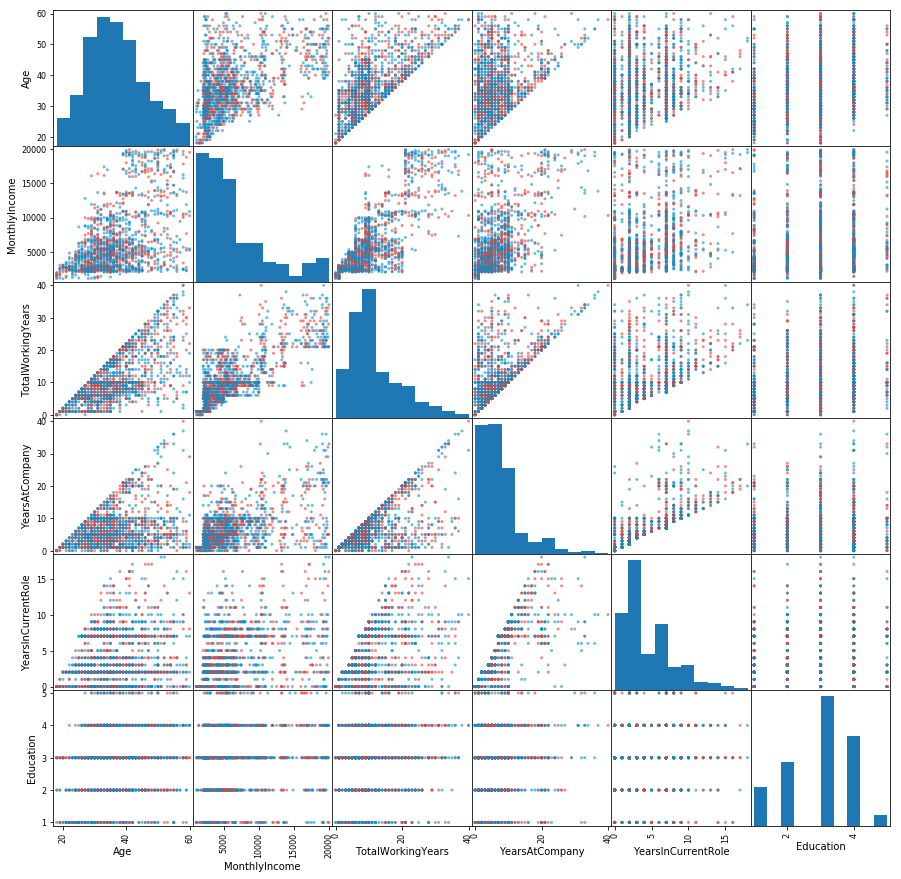

In [116]:
#fig = scatter_matrix(ibm_num_core_df, figsize=(15, 15), alpha = 0.2, color=colors)
color_wheel = {'Male': "#0392cf", 
               'Female': "#ee4035"}
colors = ibm_num_core_df1["Gender"].map(lambda x: color_wheel.get(x))
ax = scatter_matrix(ibm_num_core_df1, color=colors, alpha=0.6, figsize=(15, 15), diagonal='hist')

['MALE' 'NONCONFORMING' 'TRANS']


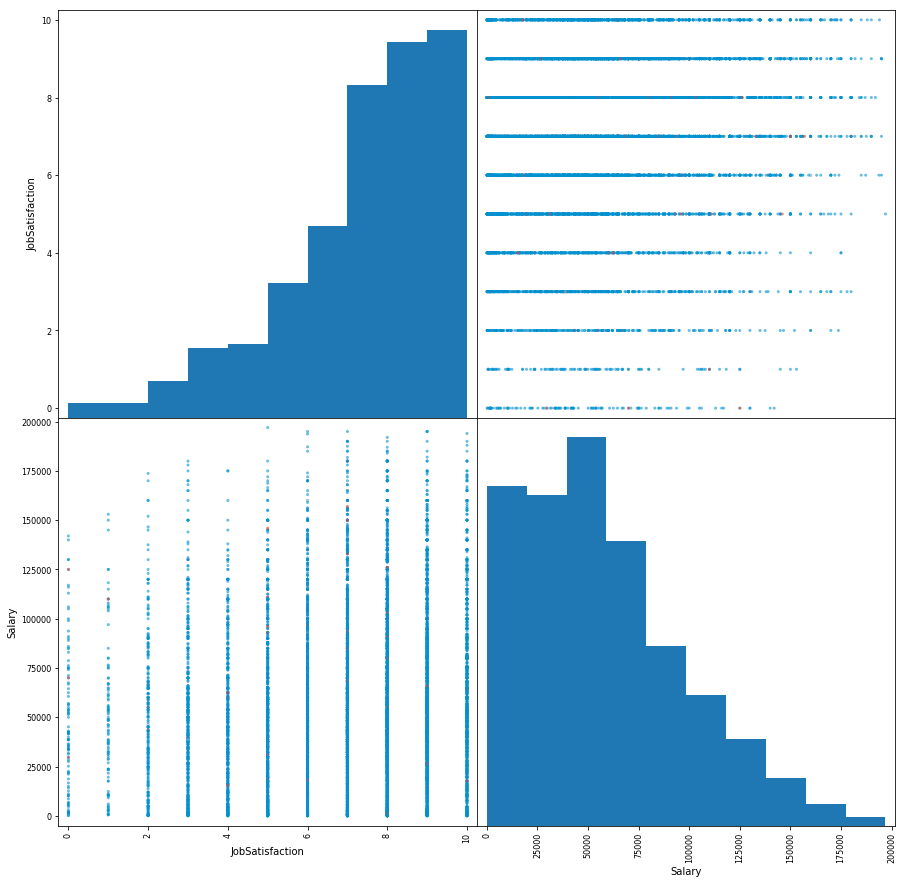

In [123]:
color_wheel2 = {'MALE': "#0392cf", 
               'NONCONFORMING': "#ee4035", 'TRANS': "#FAEBD7"}
colors2 = stackOverflow_num_core_df1["Gender"].map(lambda x: color_wheel2.get(x))
print(stackOverflow_num_core_df1["Gender"].unique())
ax2 = scatter_matrix(stackOverflow_num_core_df1, color=colors2, alpha=0.6, figsize=(15, 15), diagonal='hist')


## The distribution of each number feature in dataframe

We have six category features in the dataframe.
- YearsInCurrentRole
- YearsAtCompany
- Age
- MonthlyIncome
- TotalWorkingYears
- Education


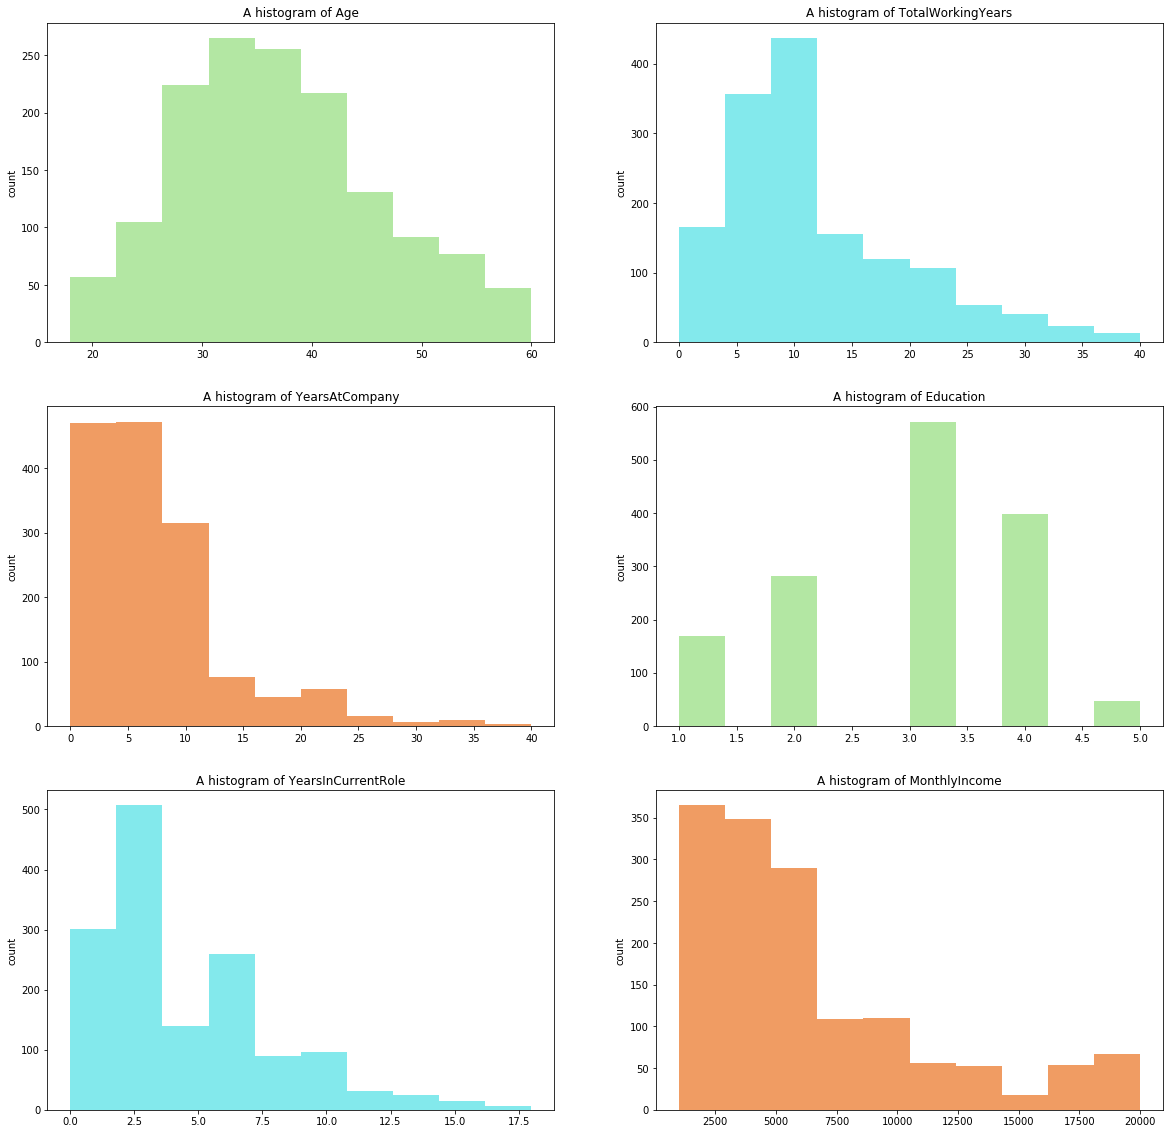

In [125]:
fig = plt.gcf()
fig.set_size_inches(20, 20)
colors = ['#f09c63', '#b3e7a3', '#83e9ec'] 
for k, col in zip(range(1, 7), list(set(ibm_num_core_df1.columns) - set(['Gender']))):
    plt.subplot(3, 2, k)
    vals = ibm_num_core_df1[col]
    vals.plot(kind = 'hist', color = colors[k%3])
    plt.gcf()
    plt.title('A histogram of ' + col)
    plt.ylabel('count')
plt.subplots_adjust( wspace=0.2, hspace=0.2)

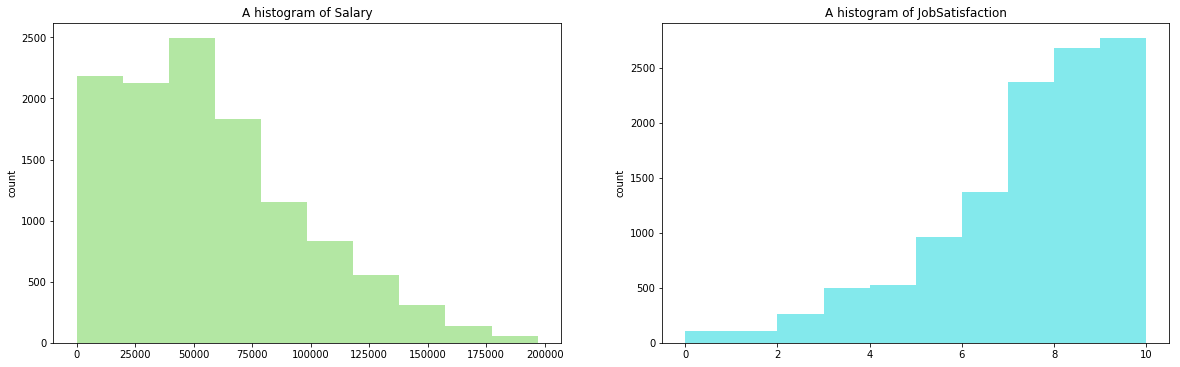

In [128]:
fig = plt.gcf()
fig.set_size_inches(20, 20)
colors2 = ['#f09c63', '#b3e7a3'] 
for k, col in zip(range(1, 7), list(set(stackOverflow_num_core_df1.columns) - set(['Gender']))):
    plt.subplot(3, 2, k)
    vals2 = stackOverflow_num_core_df1[col]
    vals2.plot(kind = 'hist', color = colors[k%3])
    plt.gcf()
    plt.title('A histogram of ' + col)
    plt.ylabel('count')
plt.subplots_adjust( wspace=0.2, hspace=0.2)

In [134]:
ibm_category_df.dtypes

Attrition         object
EducationField    object
Gender            object
JobRole           object
MaritalStatus     object
OverTime          object
dtype: object

In [133]:
stackOverflow_category_df1.dtypes

FormalEducation    object
MajorUndergrad     object
Gender             object
YearsProgram       object
DeveloperType      object
dtype: object

## Taking a look on each categoy feature in dataframe

We have six category features in the dataframe.
- Attrition
- EducationField
- Gender
- JobRole
- MaritalStatus
- OverTime


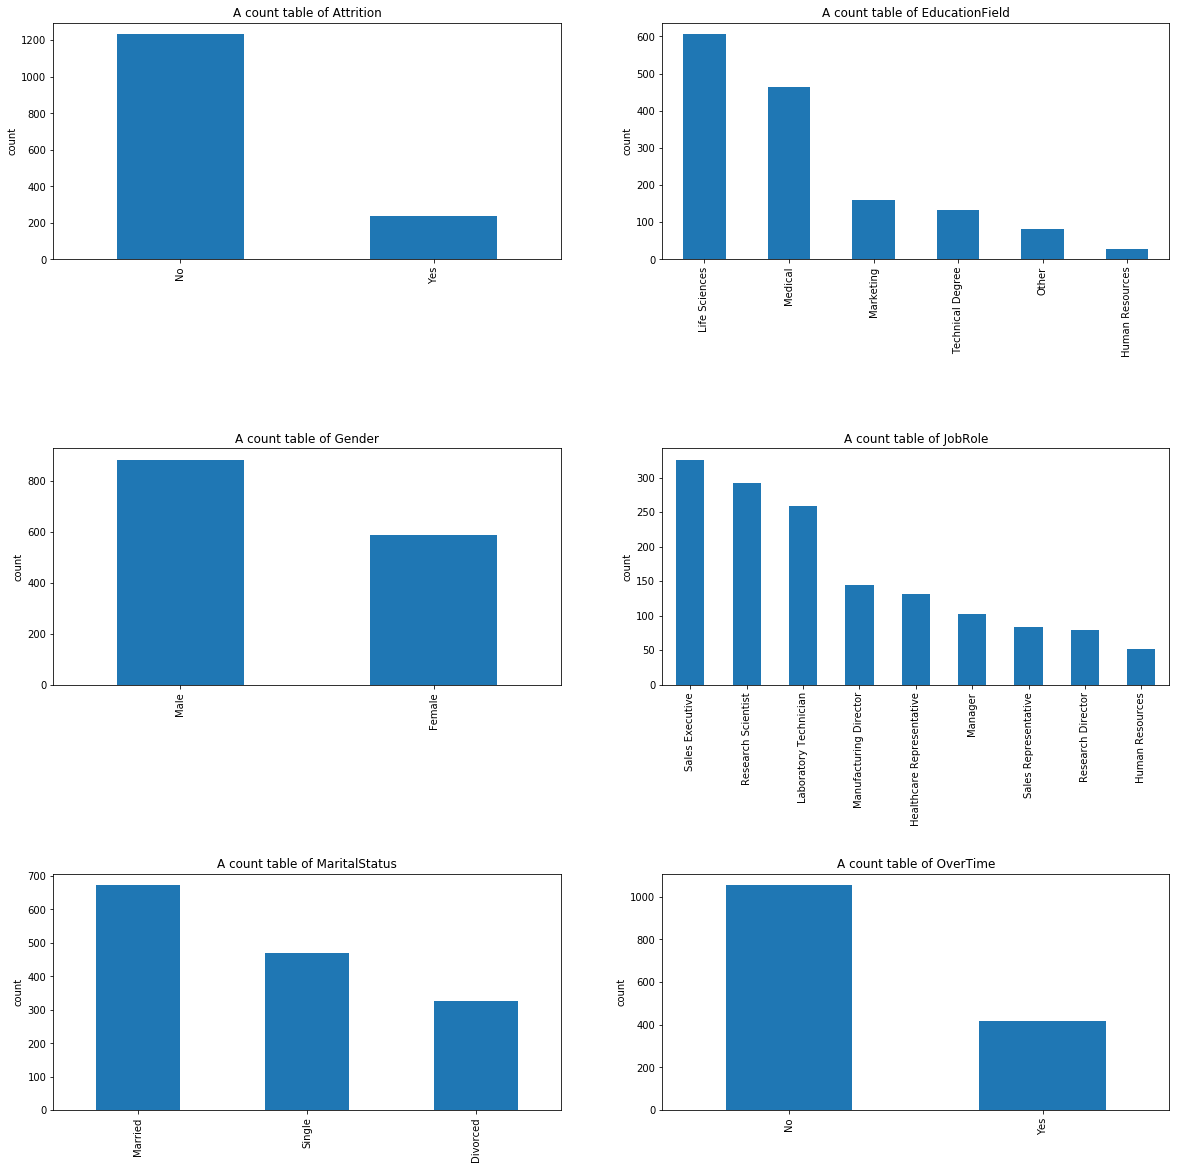

In [135]:
fig = plt.gcf()
fig.set_size_inches(20, 20)

for k, col in zip(range(1, 7), list(ibm_category_df.columns)):
    plt.subplot(3, 2, k)
    value_counts = ibm_category_df[col].value_counts()
    value_counts.plot(kind='bar')
    plt.gcf()
    plt.title('A count table of ' + col)
    plt.ylabel('count')
plt.subplots_adjust( wspace=0.2, hspace=0.8)

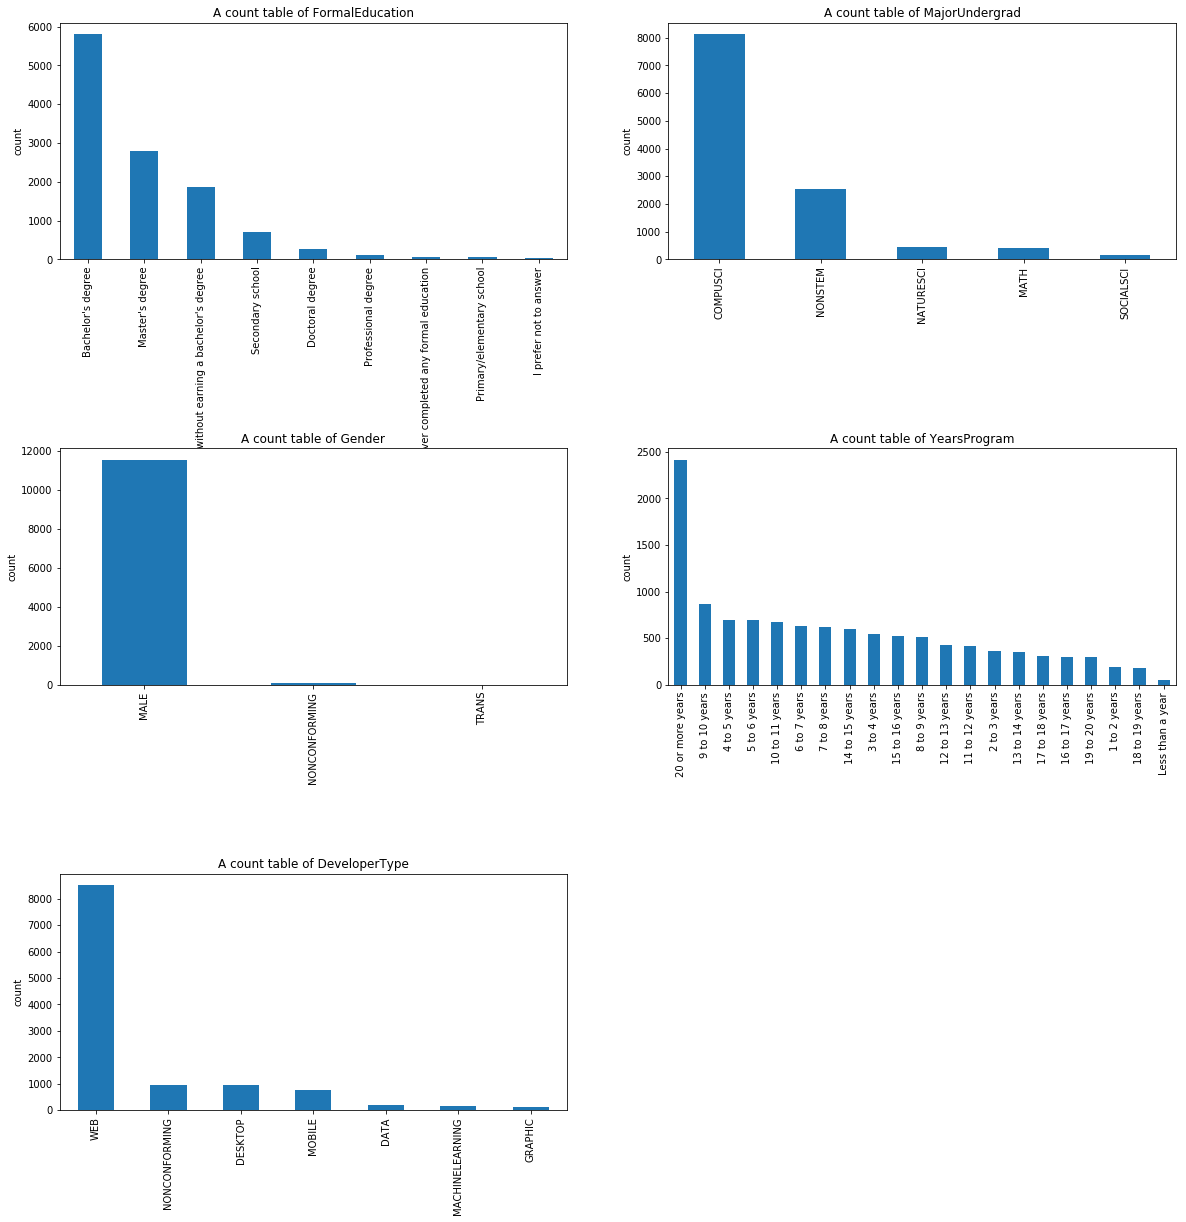

In [136]:
fig = plt.gcf()
fig.set_size_inches(20, 20)

for k, col in zip(range(1, 7), list(stackOverflow_category_df1.columns)):
    plt.subplot(3, 2, k)
    value_counts = stackOverflow_category_df1[col].value_counts()
    value_counts.plot(kind='bar')
    plt.gcf()
    plt.title('A count table of ' + col)
    plt.ylabel('count')
plt.subplots_adjust( wspace=0.2, hspace=0.8)

### Combine category features and integer features together as ibm_core_df

In [139]:
ibm_core_df_columns = list(set(ibm_category_df.columns) | set(ibm_num_core_df1.columns))
ibm_core_df = ibm_df[ibm_core_df_columns]
ibm_core_df.dtypes

JobRole               object
Age                    int64
MaritalStatus         object
Attrition             object
EducationField        object
TotalWorkingYears      int64
YearsAtCompany         int64
Education              int64
YearsInCurrentRole     int64
MonthlyIncome          int64
OverTime              object
Gender                object
dtype: object

# Part 3: Exploring The Data


### Whether the total salary is different or not in gender.


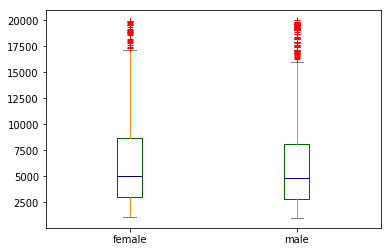

In [140]:
df = pd.DataFrame({'male' : ibm_core_df[ibm_core_df['Gender'] == 'Male'].MonthlyIncome, \
                   'female' : ibm_core_df[ibm_core_df['Gender'] == 'Female'].MonthlyIncome})
color = dict(boxes='DarkGreen', whiskers='DarkOrange',medians='DarkBlue', caps='Gray')
df.plot.box(color=color, sym='r+')

### Whether the total salary is different or not in gender.


In [38]:
salary_male = ibm_core_df[ibm_core_df.Gender == 'Male']['MonthlyIncome']
salary_female = ibm_core_df[ibm_core_df.Gender == 'Female']['MonthlyIncome']

avg_salary_male = np.mean(salary_male)
avg_salary_female = np.mean(salary_female)
print('Average monthly income of men is \t {:2.2f} inches'.format(avg_salary_male))
print('Average monthly income of women is \t\t {:2.2f} inches'.format(avg_salary_female))

Average monthly income of men is 	 6380.51 inches
Average monthly income of women is 		 6686.57 inches


# Part 4: Testing Distributions


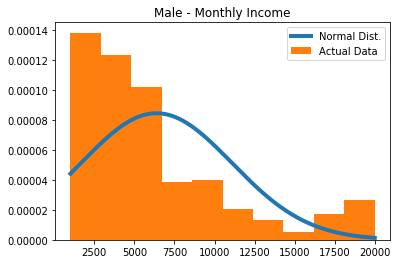

In [39]:
xs = np.arange(salary_male.min(), salary_male.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(salary_male), np.std(salary_male))
plt.plot(xs, fit, label='Normal Dist.', lw=4)
plt.hist(salary_male, normed=True, label='Actual Data');
plt.title('Male - Monthly Income')
plt.legend();

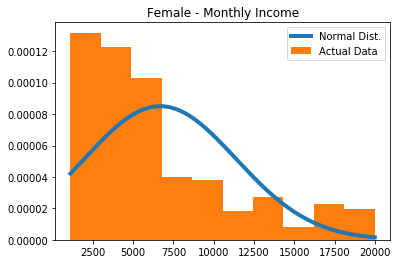

In [40]:
xs = np.arange(salary_female.min(), salary_female.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(salary_female), np.std(salary_female))
plt.plot(xs, fit, label='Normal Dist.', lw=4)
plt.hist(salary_female, normed=True, label='Actual Data');
plt.title('Female - Monthly Income')
plt.legend();

In [41]:
st_salary_male, p_salary_male = normaltest(salary_male)
st_salary_female, p_salary_female = normaltest(salary_female)
# print(st_salary_male, p_salary_male)
if p_salary_male < 0.01:
    print('There is a significant difference of salary of male from the normal distribution!')
else:
    print('There is NOT a significant difference of salary of male from the normal distribution!')
    
# print(st_salary_female, p_salary_female)

if p_salary_female < 0.01:
    print('There is a significant difference of salary of female from the normal distribution!')
else:
    print('There is NOT a significant difference of salary of female from the normal distribution!')

There is a significant difference of salary of male from the normal distribution!
There is a significant difference of salary of female from the normal distribution!


# Part 5: Data Analysis


### Compare the difference of gender given different category or conditions

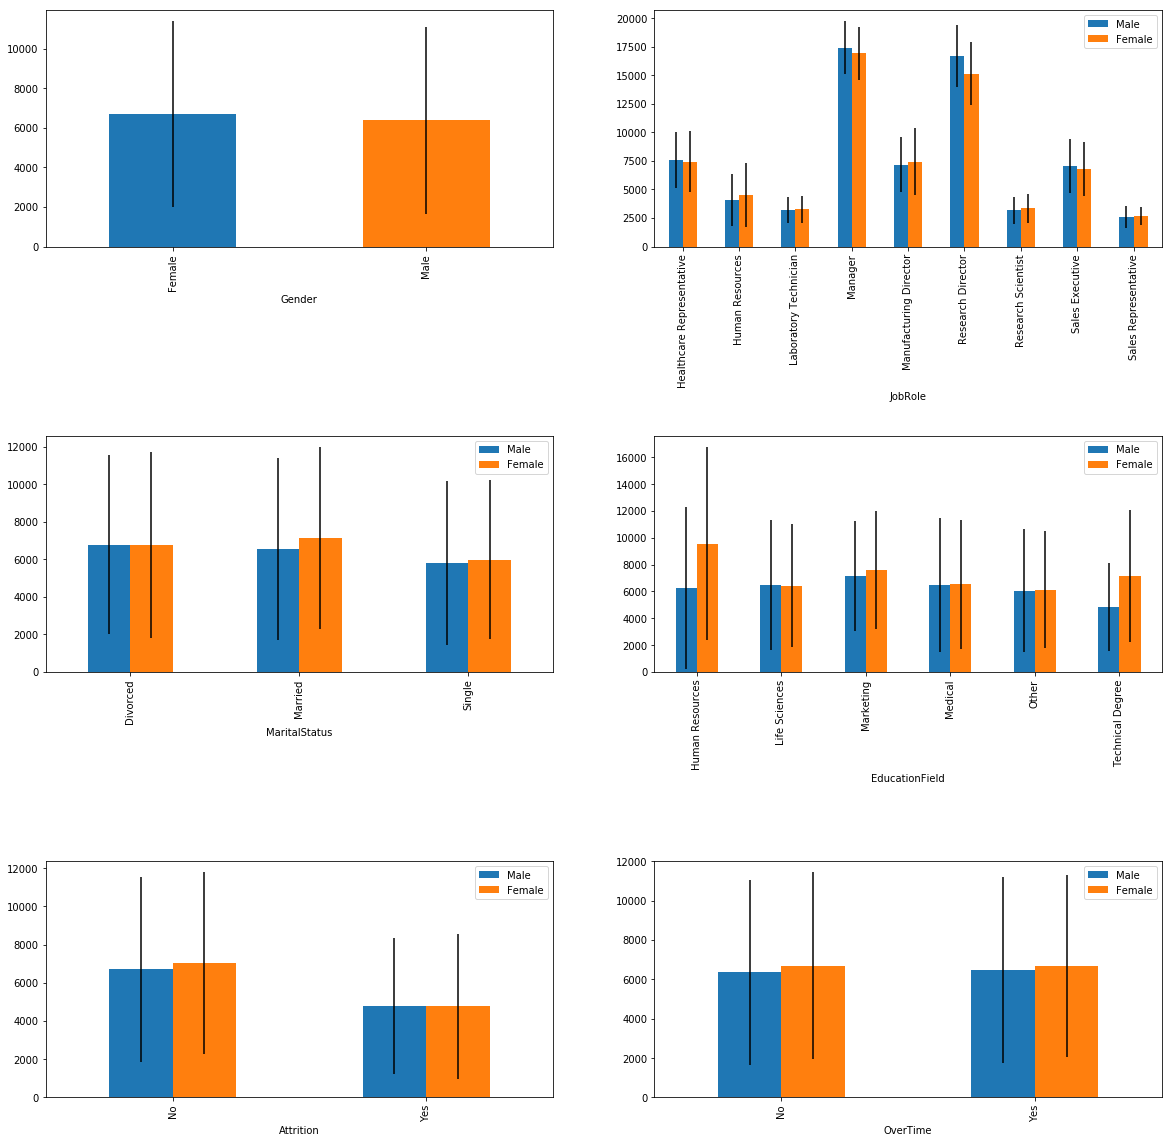

In [42]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))
fig.subplots_adjust(hspace = .8, wspace=.2)
set1 = set(ibm_category_df.columns) - set(['Gender'])

#plot the only gender category
means = ibm_core_df.groupby(['Gender']).MonthlyIncome.mean()
std = ibm_core_df.groupby(['Gender']).MonthlyIncome.std()
means.plot(yerr = std, kind='bar', ax=axes[0, 0])


set1 = set(ibm_category_df.columns) - set(['Gender'])
for k, col in zip(range(1, 6), list(set1)):
    means1 = ibm_core_df[ibm_core_df.Gender == 'Male'].groupby([col]).MonthlyIncome.mean()
    means2 = ibm_core_df[ibm_core_df.Gender == 'Female'].groupby([col]).MonthlyIncome.mean()
    means = pd.concat([means1, means2], axis = 1, keys= ['Male', 'Female'])
    std1 = ibm_core_df[ibm_core_df.Gender == 'Male'].groupby([col]).MonthlyIncome.std()
    std2 = ibm_core_df[ibm_core_df.Gender == 'Female'].groupby([col]).MonthlyIncome.std()
    std = pd.concat([std1, std2], axis = 1, keys= ['Male', 'Female'])
    means.plot(yerr=std, kind='bar', ax=axes[k // 2, k % 2])

### Test the significance of gender salary given different category or conditions

- Totally salary difference difference

In [43]:
salary_male = ibm_core_df[ibm_core_df.Gender == 'Male']['MonthlyIncome']
salary_female = ibm_core_df[ibm_core_df.Gender == 'Female']['MonthlyIncome']

t_val, p_val = ttest_ind(salary_male, salary_female)
if p_val < 0.01:
    print('There is a significant difference of salary in gender!!!!!')
else:
    print('There is NOT a significant difference of salary in gender!')

There is NOT a significant difference of salary in gender!


In [44]:
set1 = set(ibm_category_df.columns) - set(['Gender'])
print(set1)

{'JobRole', 'MaritalStatus', 'EducationField', 'Attrition', 'OverTime'}


- Salary difference given different job roles

Given the same <b>Job Role</b> status, the diffrerence is not significantly different.<p>

In [45]:
for job in ibm_core_df.JobRole.unique():
    print('Job Role:', job)
    salary_male = ibm_core_df[(ibm_core_df.Gender == 'Male') & (ibm_core_df.JobRole == job)].MonthlyIncome
    salary_female = ibm_core_df[(ibm_core_df.Gender == 'Female') & (ibm_core_df.JobRole == job)].MonthlyIncome
    t_val, p_val = ttest_ind(salary_male, salary_female)
    if p_val < 0.01:
        print('There is a significant difference of salary in gender given the same JobRole\n')
    else:
        print('There is NOT a significant difference of salary in gender given the same JobRole!\n')

Job Role: Sales Executive
There is NOT a significant difference of salary in gender given the same JobRole!

Job Role: Research Scientist
There is NOT a significant difference of salary in gender given the same JobRole!

Job Role: Laboratory Technician
There is NOT a significant difference of salary in gender given the same JobRole!

Job Role: Manufacturing Director
There is NOT a significant difference of salary in gender given the same JobRole!

Job Role: Healthcare Representative
There is NOT a significant difference of salary in gender given the same JobRole!

Job Role: Manager
There is NOT a significant difference of salary in gender given the same JobRole!

Job Role: Sales Representative
There is NOT a significant difference of salary in gender given the same JobRole!

Job Role: Research Director
There is NOT a significant difference of salary in gender given the same JobRole!

Job Role: Human Resources
There is NOT a significant difference of salary in gender given the same JobR

Given the same <b>MaritalStatus</b> status, the diffrerence is not significantly different.<p>

In [46]:
for status in ibm_core_df.MaritalStatus.unique():
    print('MaritalStatus:', status)
    salary_male = ibm_core_df[(ibm_core_df.Gender == 'Male') & (ibm_core_df.MaritalStatus == status)].MonthlyIncome
    salary_female = ibm_core_df[(ibm_core_df.Gender == 'Female') & (ibm_core_df.MaritalStatus == status)].MonthlyIncome
    t_val, p_val = ttest_ind(salary_male, salary_female)
    if p_val < 0.01:
        print('There is a significant difference of salary in gender given the same MaritalStatus\n')
    else:
        print('There is NOT a significant difference of salary in gender given the same MaritalStatus!\n')

MaritalStatus: Single
There is NOT a significant difference of salary in gender given the same MaritalStatus!

MaritalStatus: Married
There is NOT a significant difference of salary in gender given the same MaritalStatus!

MaritalStatus: Divorced
There is NOT a significant difference of salary in gender given the same MaritalStatus!



Given the same <b>OverTime</b> status, the diffrerence is not significantly different.<p>

In [47]:
for status in ibm_core_df.OverTime.unique():
    print('OverTime:', status)
    salary_male = ibm_core_df[(ibm_core_df.Gender == 'Male') & (ibm_core_df.OverTime == status)].MonthlyIncome
    salary_female = ibm_core_df[(ibm_core_df.Gender == 'Female') & (ibm_core_df.OverTime == status)].MonthlyIncome
    t_val, p_val = ttest_ind(salary_male, salary_female)
    if p_val < 0.01:
        print('There is a significant difference of salary in gender given the same OverTime\n')
    else:
        print('There is NOT a significant difference of salary in gender given the same OverTime!\n')

OverTime: Yes
There is NOT a significant difference of salary in gender given the same OverTime!

OverTime: No
There is NOT a significant difference of salary in gender given the same OverTime!



We found the difference between gender in <b>Technical Degree</b> is huge.<p>
However in other majors, the diffrerence is not significantly different.<p>

In [48]:
for status in ibm_core_df.EducationField.unique():
    print('EducationField:', status)
    salary_male = ibm_core_df[(ibm_core_df.Gender == 'Male') & (ibm_core_df.EducationField == status)].MonthlyIncome
    salary_female = ibm_core_df[(ibm_core_df.Gender == 'Female') & (ibm_core_df.EducationField == status)].MonthlyIncome
    t_val, p_val = ttest_ind(salary_male, salary_female)
    if p_val < 0.01:
        print('There is a significant difference of salary in gender given the same EducationField\n')
    else:
        print('There is NOT a significant difference of salary in gender given the same EducationField!\n')

EducationField: Life Sciences
There is NOT a significant difference of salary in gender given the same EducationField!

EducationField: Other
There is NOT a significant difference of salary in gender given the same EducationField!

EducationField: Medical
There is NOT a significant difference of salary in gender given the same EducationField!

EducationField: Marketing
There is NOT a significant difference of salary in gender given the same EducationField!

EducationField: Technical Degree
There is a significant difference of salary in gender given the same EducationField

EducationField: Human Resources
There is NOT a significant difference of salary in gender given the same EducationField!



Given the same <b>Attrition</b> status, the diffrerence is not significantly different.<p>

In [49]:
for status in ibm_core_df.Attrition.unique():
    print('Attrition:', status)
    salary_male = ibm_core_df[(ibm_core_df.Gender == 'Male') & (ibm_core_df.Attrition == status)].MonthlyIncome
    salary_female = ibm_core_df[(ibm_core_df.Gender == 'Female') & (ibm_core_df.Attrition == status)].MonthlyIncome
    t_val, p_val = ttest_ind(salary_male, salary_female)
    if p_val < 0.01:
        print('There is a significant difference of salary in gender given the same Attrition\n')
    else:
        print('There is NOT a significant difference of salary in gender given the same Attrition!\n')

Attrition: Yes
There is NOT a significant difference of salary in gender given the same Attrition!

Attrition: No
There is NOT a significant difference of salary in gender given the same Attrition!



## Summary1: 

- We found there is no siginificantly different monthly income between gender, totally.
- In Technical Degree, There is siginificantly different monthly income between gender.

## Expolring the data on the people with Technical Degree.

### Firstly, We take a look on how many data left
- We found the original data is 1470 and the remaining data is 132, decreasing about 90%.
- It will not enough to inference the solid result

In [50]:
ibm_tech_df = ibm_core_df[(ibm_core_df.EducationField == 'Technical Degree')]
print(ibm_core_df.shape)
print(ibm_tech_df.shape)

(1470, 12)
(132, 12)


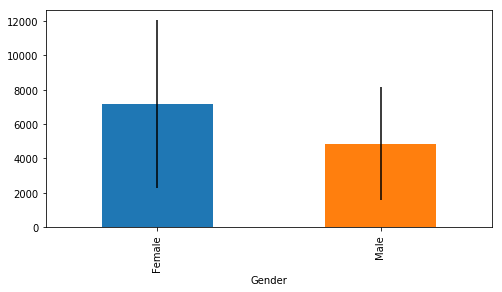

In [51]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
fig.subplots_adjust(hspace = .8, wspace=.2)

#plot the only gender category
means = ibm_tech_df.groupby(['Gender']).MonthlyIncome.mean()
std = ibm_tech_df.groupby(['Gender']).MonthlyIncome.std()
means.plot(yerr = std, kind='bar')

### Test the p value
- The p-value is 0.0016, which is more significant.

In [52]:
salary_male = ibm_tech_df[ibm_tech_df.Gender == 'Male']['MonthlyIncome']
salary_female = ibm_tech_df[ibm_tech_df.Gender == 'Female']['MonthlyIncome']

t_val, p_val = ttest_ind(salary_male, salary_female)
print('p value:',p_val )
if p_val < 0.01:
    print('There is a significant difference of salary in gender!!!!!')
else:
    print('There is NOT a significant difference of salary in gender!')

p value: 0.0016282117954473548
There is a significant difference of salary in gender!!!!!


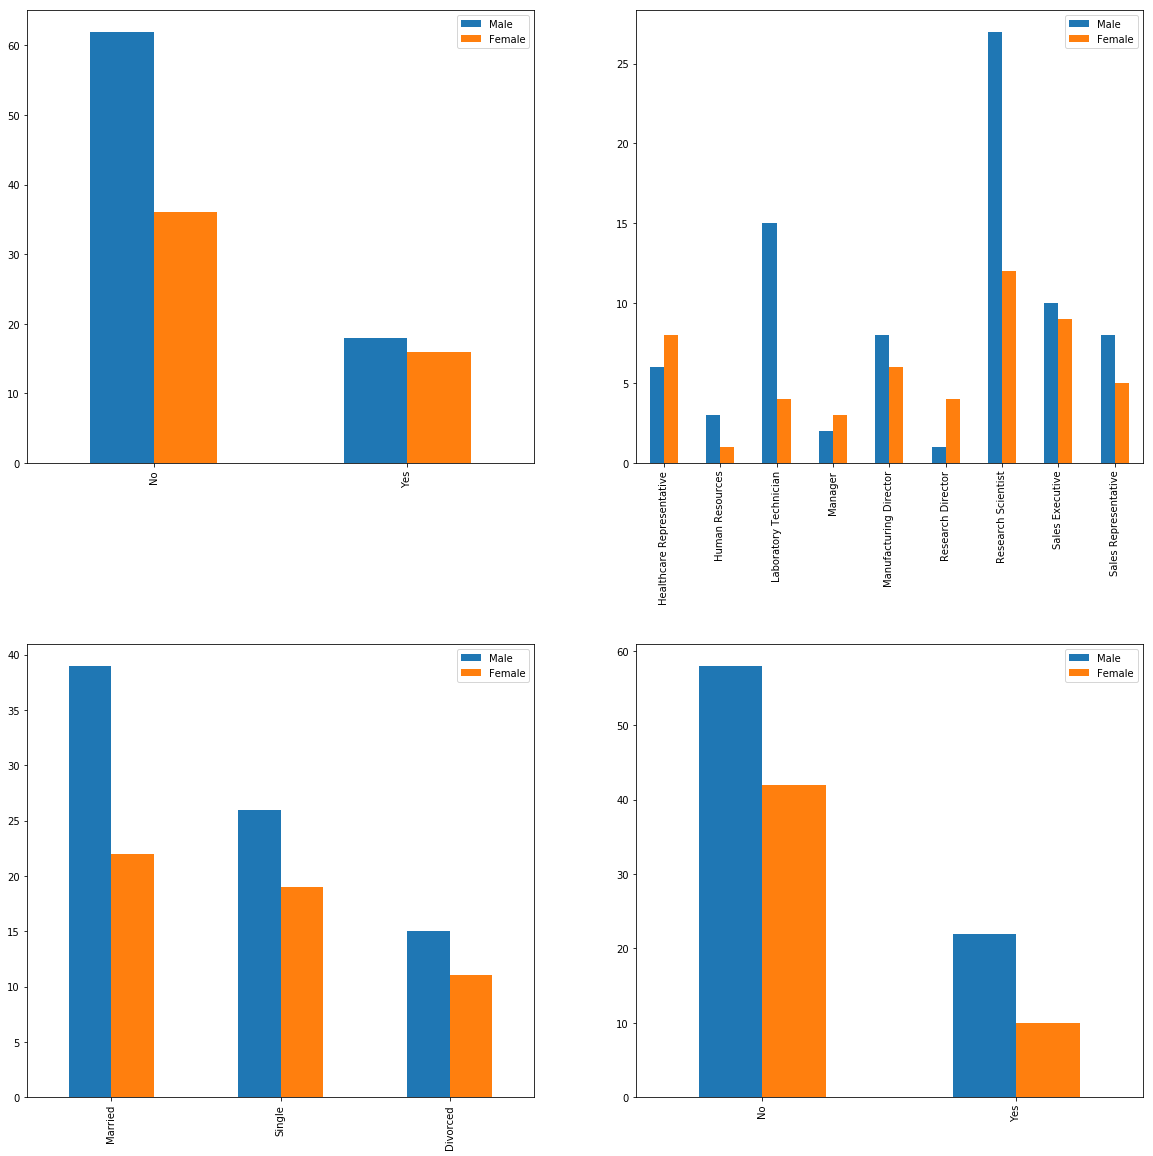

In [53]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
fig.subplots_adjust(hspace = .4, wspace=.2)
set1 = set(ibm_category_df.columns) - set(['Gender']) - set(['EducationField'])
for k, col in zip(range(0, 4), list(set1)):
    value_counts1 = ibm_tech_df[ibm_tech_df.Gender == 'Male'][col].value_counts()
    value_counts2 = ibm_tech_df[ibm_tech_df.Gender == 'Female'][col].value_counts()
    value_counts = pd.concat([value_counts1, value_counts2], axis = 1, keys= ['Male', 'Female'])
    value_counts.plot(kind='bar', ax=axes[k // 2, k % 2])

### Compare the difference of gender given different category or conditions

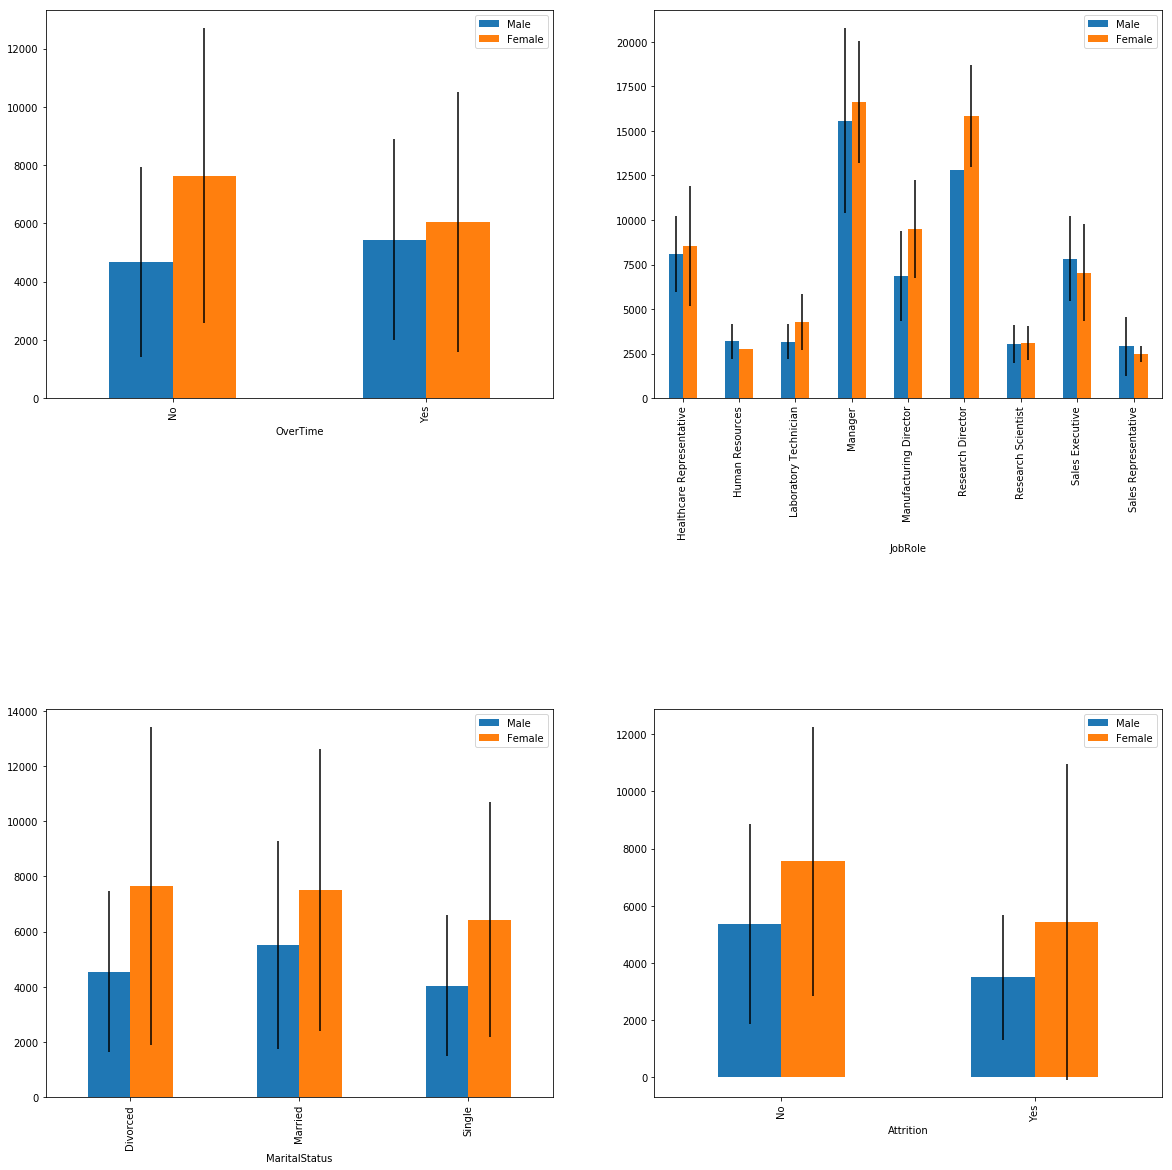

In [54]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
fig.subplots_adjust(hspace = .8, wspace=.2)

#plot the only gender category


set1 = set(ibm_category_df.columns) - set(['Gender']) - set(['EducationField'])
for k, col in zip(range(0, 4), list(set1)):
    means1 = ibm_tech_df[ibm_tech_df.Gender == 'Male'].groupby([col]).MonthlyIncome.mean()
    means2 = ibm_tech_df[ibm_tech_df.Gender == 'Female'].groupby([col]).MonthlyIncome.mean()
    means = pd.concat([means1, means2], axis = 1, keys= ['Male', 'Female'])
    std1 = ibm_tech_df[ibm_tech_df.Gender == 'Male'].groupby([col]).MonthlyIncome.std()
    std2 = ibm_tech_df[ibm_tech_df.Gender == 'Female'].groupby([col]).MonthlyIncome.std()
    std = pd.concat([std1, std2], axis = 1, keys= ['Male', 'Female'])
    means.plot(yerr=std, kind='bar', ax=axes[k // 2, k % 2])